In [34]:
import warnings
warnings.filterwarnings('ignore')
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
## for machine learning
from sklearn import preprocessing, cluster

In [35]:
st = pd.read_csv("data_stores.csv")

In [36]:
las_vegas = st.loc[st["City"]=="Las Vegas",["Longitude","Latitude","City"]].reset_index(drop=True)
las_vegas

,Longitude,Latitude,City
0,-115.20,36.12,Las Vegas
1,-115.15,36.04,Las Vegas
2,-115.17,36.13,Las Vegas
3,-115.28,36.22,Las Vegas
4,-115.18,36.11,Las Vegas
...,...,...,...
151,-115.18,36.10,Las Vegas
152,-115.21,36.24,Las Vegas
153,-115.30,36.11,Las Vegas
154,-115.17,36.09,Las Vegas


In [37]:
las_vegas[["Latitude","Longitude"]].mean()

Latitude      36.132756
Longitude   -115.200449
dtype: float64

In [38]:
# visualize all the stores locations on foiium map
f = folium.Figure(width=750, height=750)
map_ = folium.Map(location=[ las_vegas["Latitude"].mean() ,las_vegas["Longitude"].mean()], zoom_start=11, tiles="cartodbpositron").add_to(f)
for i in range(0, las_vegas.shape[0]):
	folium.Marker([las_vegas.iloc[i]['Latitude'], las_vegas.iloc[i]['Longitude']],
              	popup=las_vegas.iloc[i]['City']).add_to(map_)
map_


In [39]:
# define the kmeans algorithm
kmeans = cluster.KMeans(
	n_clusters= 5, # how many clusters
	init='k-means++', # initialization
	max_iter= 100 , # maximum number of iterations for each run
  n_init=10,
  random_state=0
)



In [40]:
X = las_vegas[["Longitude","Latitude"]]

In [41]:
kmeans.fit(X)

KMeans(max_iter=100, n_clusters=5, n_init=10, random_state=0)

In [42]:
kmeans.labels_

array([4, 2, 4, 3, 4, 4, 4, 0, 2, 3, 4, 4, 1, 4, 1, 4, 4, 3, 4, 4, 1, 4,
       1, 4, 3, 1, 3, 4, 4, 1, 3, 0, 4, 2, 4, 2, 4, 1, 4, 1, 4, 3, 4, 4,
       0, 2, 3, 4, 2, 3, 4, 1, 0, 0, 3, 1, 2, 2, 4, 2, 0, 2, 1, 4, 1, 4,
       3, 4, 1, 2, 4, 4, 4, 4, 2, 0, 2, 0, 4, 2, 4, 4, 2, 2, 2, 1, 1, 1,
       1, 4, 2, 4, 2, 4, 2, 3, 4, 1, 4, 0, 4, 4, 2, 4, 4, 1, 3, 0, 1, 0,
       1, 1, 4, 1, 4, 2, 4, 2, 3, 1, 4, 2, 4, 4, 4, 4, 4, 1, 1, 4, 2, 2,
       3, 4, 4, 2, 2, 0, 2, 4, 2, 3, 0, 4, 3, 4, 1, 1, 3, 1, 4, 4, 3, 1,
       4, 1], dtype=int32)

In [43]:
las_vegas['cluster'] = kmeans.labels_

In [44]:
las_vegas

,Longitude,Latitude,City,cluster
0,-115.20,36.12,Las Vegas,4
1,-115.15,36.04,Las Vegas,2
2,-115.17,36.13,Las Vegas,4
3,-115.28,36.22,Las Vegas,3
4,-115.18,36.11,Las Vegas,4
...,...,...,...,...
151,-115.18,36.10,Las Vegas,4
152,-115.21,36.24,Las Vegas,3
153,-115.30,36.11,Las Vegas,1
154,-115.17,36.09,Las Vegas,4


In [48]:
# visualize the clusters
n_clusters = 5
# create the folium object
f = folium.Figure(width=750, height=750)
# initialize the map on the mean coordinates of the stores
map_ = folium.Map(location=[las_vegas['Latitude'].mean(), las_vegas['Longitude'].mean()], zoom_start=11, tiles="cartodbpositron").add_to(f)
# create a color palette for the clusters based on the number of clusters
colors = sns.color_palette("Set2", n_colors=n_clusters).as_hex()
# add the stores to the map and color them based on the cluster they belong to
for i in range(0, las_vegas.shape[0]):
    folium.Circle(
        location=[las_vegas.iloc[i]['Latitude'], las_vegas.iloc[i]['Longitude']],
        color=colors[las_vegas.iloc[i]['cluster']], 
        fill=True,
        fill_color=colors[las_vegas.iloc[i]['cluster']],
        radius=200).add_to(map_)
map_


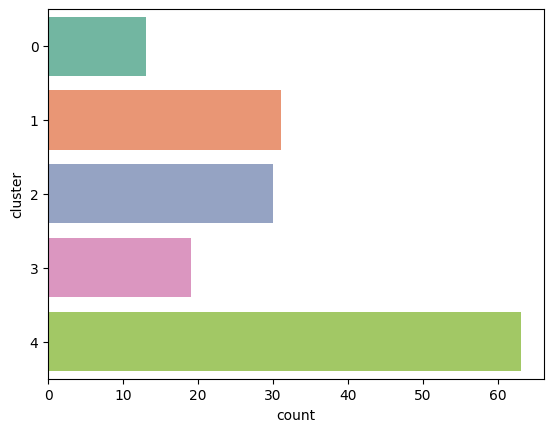

In [49]:
# We can also see how the clusters are distributed by plotting the number of stores per cluster
fig, ax = plt.subplots()
sns.countplot(y="cluster", data=las_vegas, palette=colors)
ax.set_xlabel("count")
ax.set_ylabel("cluster")
plt.show()


In [50]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_, metric='euclidean')


np.float64(0.43441869212618184)

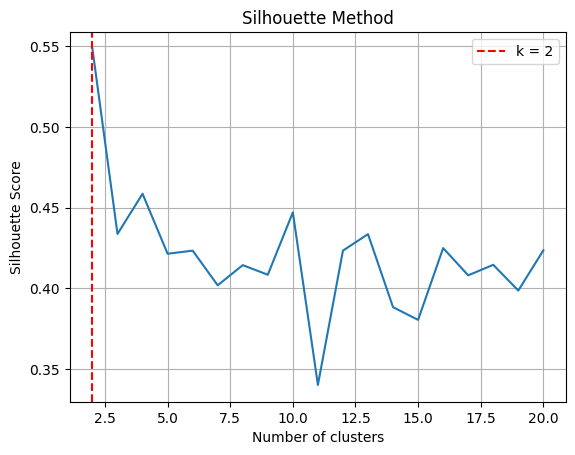

In [51]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

# calculate the silhouette score
sil = []
# define the range of clusters to test
kmax = 20
# fit the model for each number of clusters
for k in range(2, kmax+1):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))


# find the best number of clusters that maximizes the silhouette score
k = np.argmax(sil)+2

# plot the silhouette score
fig, ax = plt.subplots()
plt.plot(range(2, kmax+1), sil)
plt.axvline(k, ls='--', color="red", label="k = "+str(k))
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()
